<a href="https://colab.research.google.com/github/hariharan-075/ML/blob/main/2420080075_ML_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df= pd.read_csv("/content/drive/MyDrive/ML Datasets/Titanic-Dataset.csv")

In [ ]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])
print("missing values per column",df.isnull().sum())


Number of rows 891
Number of rows 12
missing values per column PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)
irrelavent_cols=['PassengerId','Name','Ticket','Cabin']
df.drop(columns=irrelavent_cols,inplace=True)
print('\nMissing values after Handling')
print(df.isnull().sum())


Missing values after Handling
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


/tmp/ipython-input-1095001354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-1095001354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
df['Fare']=np.where(df['Fare']<lower_bound,lower_bound,df['Fare'])
upper_bound=Q3+1.5*IQR
df['Fare']=np.where(df['Fare']>upper_bound,upper_bound,df['Fare'])

In [ ]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
label_encoder=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col]=label_encoder.fit_transform(df[col])

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
 # Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
print("\nDataset Split Shapes")
print("---------------------")
print("Training Set   :", X_train.shape, y_train.shape)
print("Validation Set :", X_val.shape, y_val.shape)
print("Testing Set    :", X_test.shape, y_test.shape)



Dataset Split Shapes
---------------------
Training Set   : (623, 8) (623,)
Validation Set : (134, 8) (134,)
Testing Set    : (134, 8) (134,)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

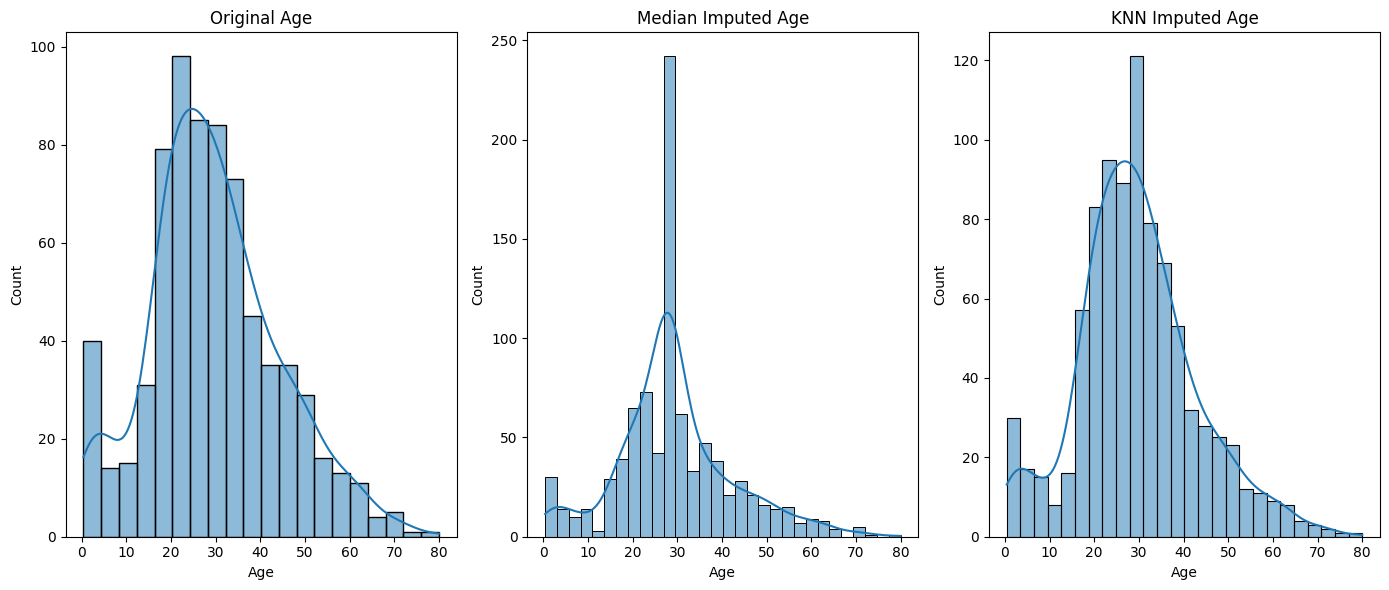

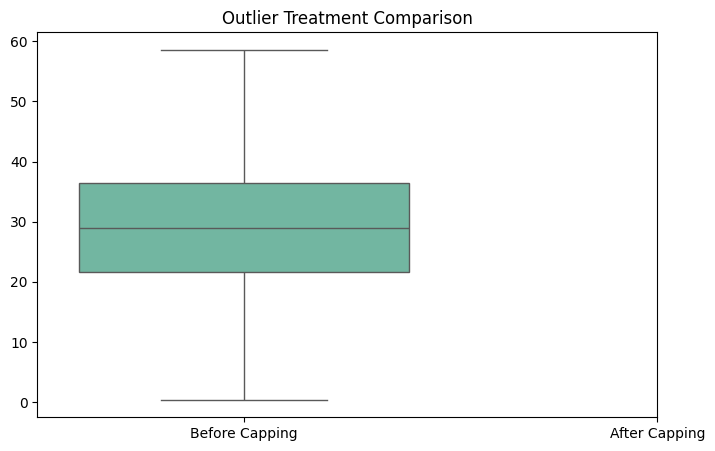

In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("Titanic-Dataset.csv")


print(df.info())
print(df.head())

# Keep a copy of original data
df_original = df.copy()

# -------------------------------
# 2. Median Imputation (Age)
# -------------------------------
df_median = df.copy()
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

# -------------------------------
# 3. KNN Imputation (Age)
# -------------------------------
df_knn = df.copy()

# Select numeric columns for KNN
num_cols = df_knn.select_dtypes(include=np.number)

imputer = KNNImputer(n_neighbors=5)
num_imputed = imputer.fit_transform(num_cols)

df_knn[num_cols.columns] = num_imputed

# -------------------------------
# 4. Outlier Treatment (Age)
# -------------------------------
Q1 = df_knn['Age'].quantile(0.25)
Q3 = df_knn['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Capping
df_capped = df_knn.copy()
df_capped['Age'] = np.where(df_capped['Age'] > upper, upper,
                    np.where(df_capped['Age'] < lower, lower, df_capped['Age']))

# Removal
df_removed = df_knn[(df_knn['Age'] >= lower) & (df_knn['Age'] <= upper)]

# -------------------------------
# 5. Feature Scaling
# -------------------------------
scaler = StandardScaler()
num_features = ['Age', 'Fare']

df_scaled = df_capped.copy()
df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])

# -------------------------------
# 6. Save CSV Files
# -------------------------------
df_median.to_csv("titanic_median_imputed.csv", index=False)
df_knn.to_csv("titanic_knn_imputed.csv", index=False)
df_capped.to_csv("titanic_outlier_capped.csv", index=False)
df_removed.to_csv("titanic_outlier_removed.csv", index=False)
df_scaled.to_csv("titanic_scaled.csv", index=False)

print("All processed datasets saved successfully!")

# -------------------------------
# 7. Visualization
# -------------------------------
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.histplot(df_original['Age'], kde=True)
plt.title("Original Age")

plt.subplot(1,3,2)
sns.histplot(df_median['Age'], kde=True)
plt.title("Median Imputed Age")

plt.subplot(1,3,3)
sns.histplot(df_knn['Age'], kde=True)
plt.title("KNN Imputed Age")

plt.tight_layout()
plt.show()

# Boxplot comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=[df_knn['Age'], df_capped['Age']], palette="Set2")
plt.xticks([0,1], ['Before Capping', 'After Capping'])
plt.title("Outlier Treatment Comparison")
plt.show()
